# Assignments 1 : 数据集上的探索性数据分析和数据预处理

## 相关信息

本代码是北京理工大学计算机学院 2021 数据挖掘课程的课程作业。
+ 项目主页为：[DataMining-Course-of-BIT](https://github.com/tenkeyseven/DataMining-Course-of-BIT)
+ 详细说明为：[Assignments 1](https://github.com/tenkeyseven/DataMining-Course-of-BIT/tree/main/Assignments-1)
+ 本部分实验采用的数据集为：[Wine Reviews](https://www.kaggle.com/zynicide/wine-reviews)

## 作业要求：
### 一、数据可视化和摘要
+ 数据摘要
  + 标称属性，给出每个可能取值的频数
  + 数值属性，给出5数概括及缺失值的个数
+ 数据可视化
  + 使用直方图、盒图等检查数据分布及离群点

### 二、缺失数据的处理
观察数据集中缺失数据，分析其缺失的原因。分别使用下列四种策略对缺失值进行处理:
+ 将缺失部分剔除
+ 用最高频率值来填补缺失值
+ 通过属性的相关关系来填补缺失值
+ 通过数据对象之间的相似性来填补缺失值



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
file_path_130 = '../Datasets/wine-reviews/winemag-data-130k-v2.csv'
df_130 = pd.read_csv(file_path_130)

In [7]:
# 数据预览，可见数据总数、非空数据数量和数据类型。
df_130.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


### 2、标称属性和数值属性

In [9]:
# 在所有属性中，以下部分为标称属性内容：
nominal_attributes_130 = ['country', 'designation', 'province', 'region_1', 'region_2', 'variety', 'winery', 'taster_name']
# 在所有属性中，以下部分为数值属性：
numeric_attributes_130 = ['points', 'price']

#### 2.1 标称属性的分析：频数分布

In [12]:
for column in nominal_attributes_130:
    print("本部分显示 {} 类属性的频数统计:\n{}\n".format(column, df_130[column].value_counts()))

本部分显示 country 类属性的频数统计:
US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine         

#### 2.2 标称属性的分析：利用条形图可视化频数


In [13]:
# 定义条形图可视化的函数
def nominal_attributes_plt(df, nominal_attributes, figsize=(50, 50), num=20):
    for i, column in enumerate(nominal_attributes):
        plt.subplot(3, 3, i + 1)
        df[column].value_counts()[:num].plot.bar(title=column, figsize=figsize, alpha=0.7)
    plt.show()

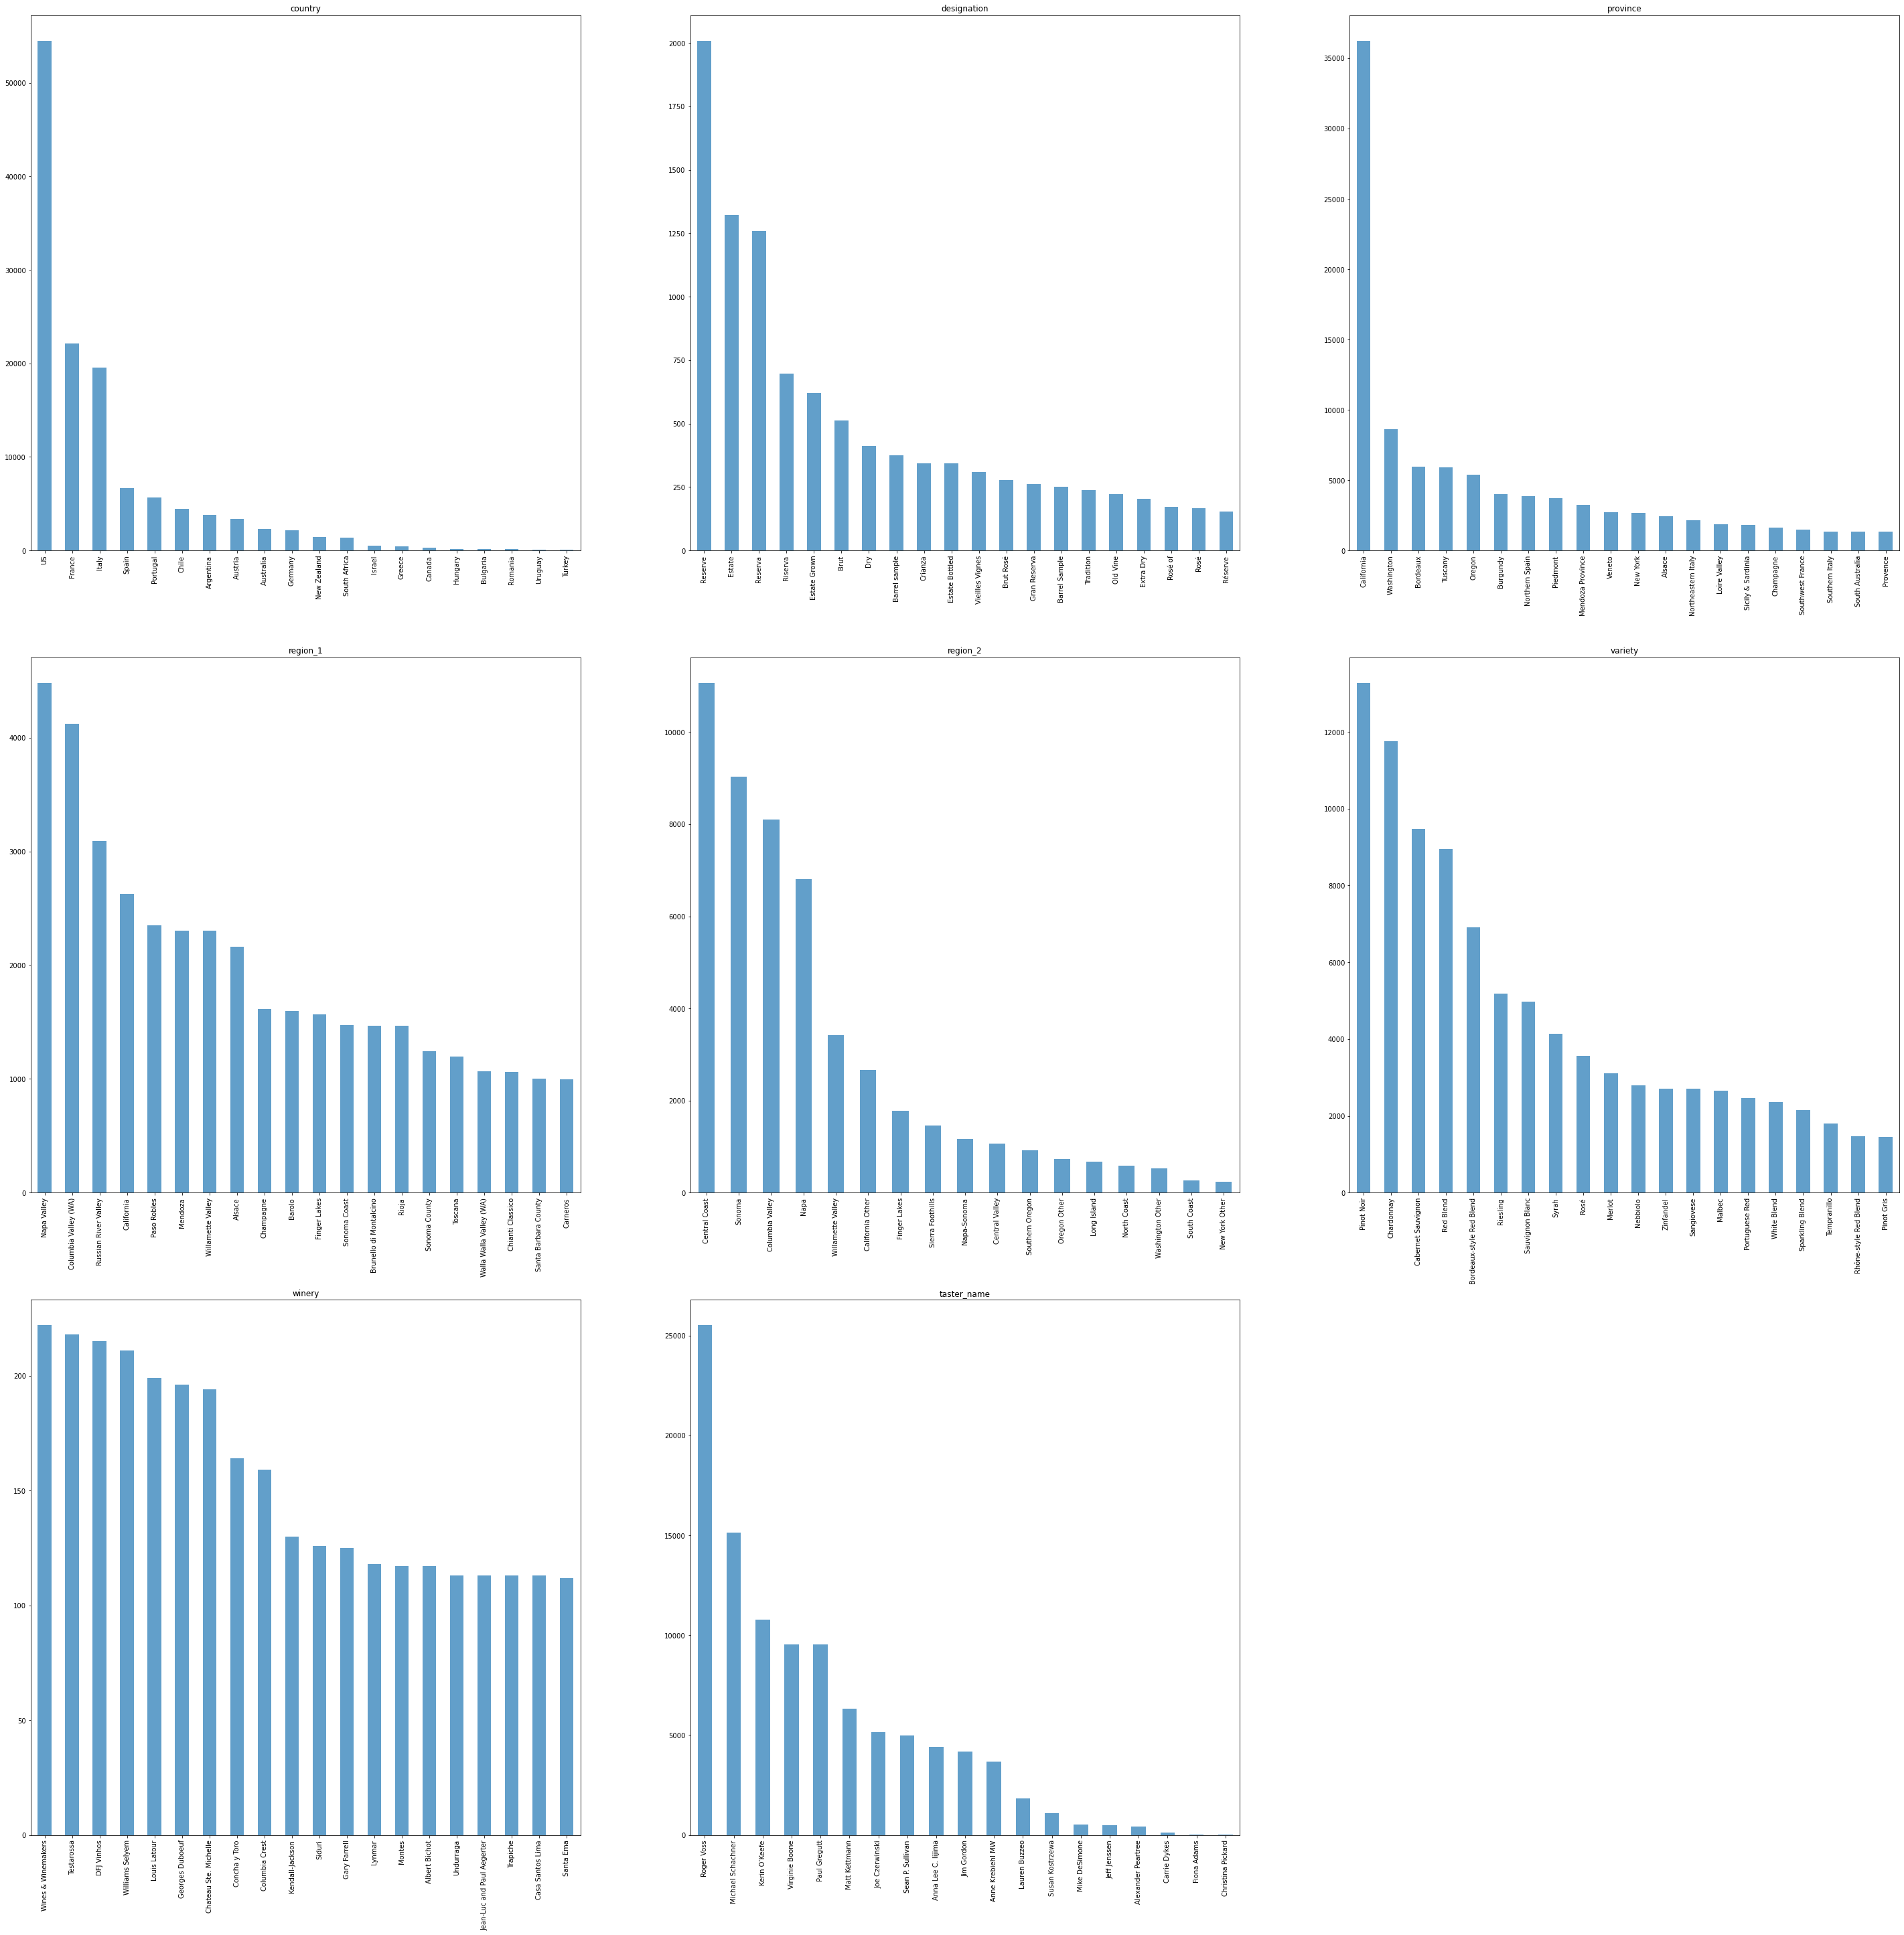

In [14]:
# winemag-data-130k-v2 中标称数据的条形图可视化
nominal_attributes_plt(df_130, nominal_attributes_130)

### 2.3 数值属性的分析：五数概括

In [22]:
# 两个数值属性的五数概括
print(df_130[numeric_attributes_130].describe())

              points          price
count  129971.000000  120975.000000
mean       88.447138      35.363389
std         3.039730      41.022218
min        80.000000       4.000000
25%        86.000000      17.000000
50%        88.000000      25.000000
75%        91.000000      42.000000
max       100.000000    3300.000000


### 2.4 数值属性的分析：五数概括的可视化（直方图、盒式图）


In [23]:
# 定义直方图函数
def numeric_attributes_hist(df, numeric_attributes, figsize=(10, 15)):
    for i, column in enumerate(numeric_attributes):
        if column == "price":
            bins, alpha = 200, 0.9
        else:
            bins, alpha = 20, 0.5
        plt.subplot(2, 1, i + 1)
        df[column].plot.hist(title=column, figsize=figsize, bins=bins, alpha=alpha)
    plt.show()

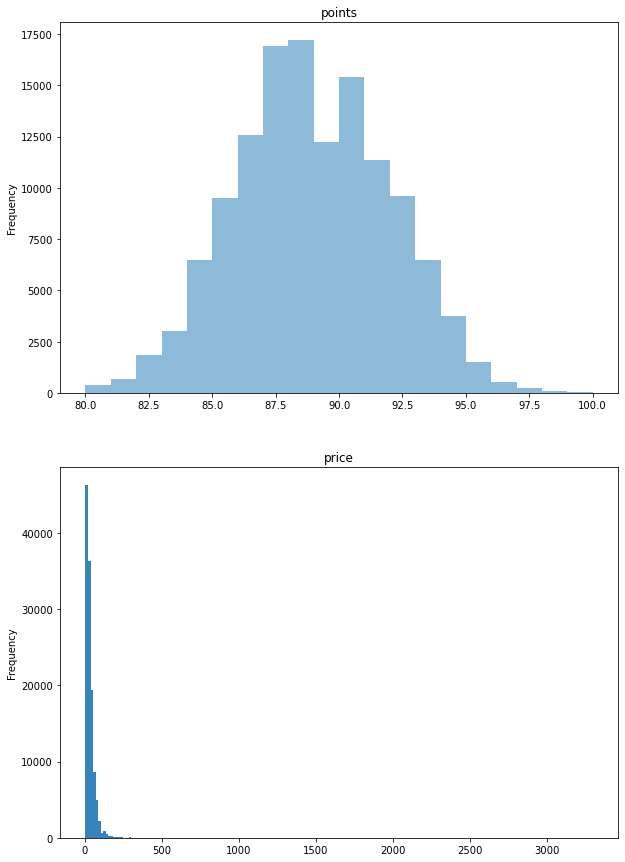

In [24]:
# winemag-data-130k-v2 数值数据直方图可视化
numeric_attributes_hist(df_130, numeric_attributes_130)

通过以上可视化后的数据，可以分析得到 Price 数据非常分散。将数值小于200的数据取出来在进行直方图分析。

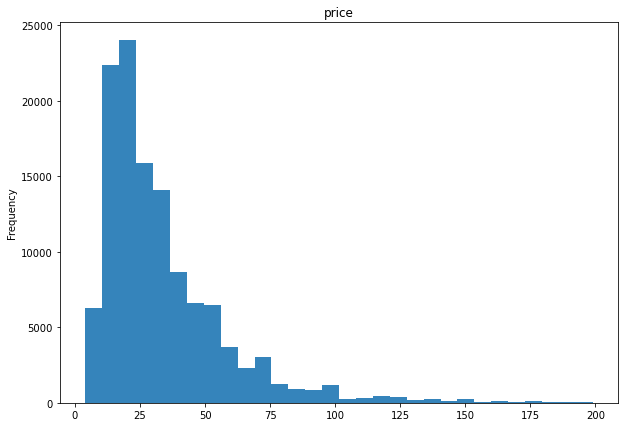

In [25]:
df_130[df_130["price"] < 200]["price"].plot.hist(title="price", figsize=(10, 7), bins=30, alpha=0.9)
plt.show()

在winemag-data-130k-v2数据中：


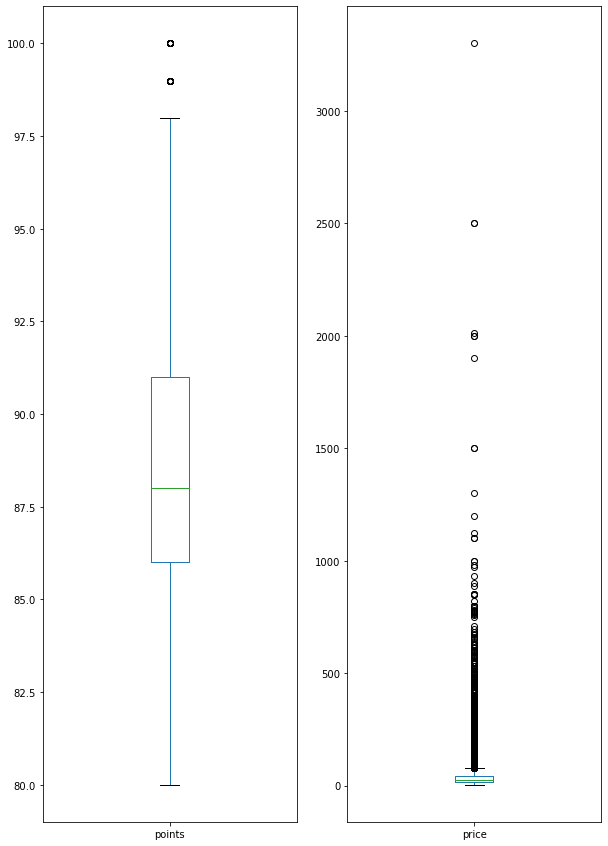

In [26]:
# 使用盒图进行分析
print("在winemag-data-130k-v2数据中：")
plt.subplot(1, 2, 1)
df_130["points"].plot.box(figsize=(10, 15))
plt.subplot(1, 2, 2)
df_130["price"].plot.box(figsize=(10, 15))
plt.show()

在winemag-data-130k-v2数据中：


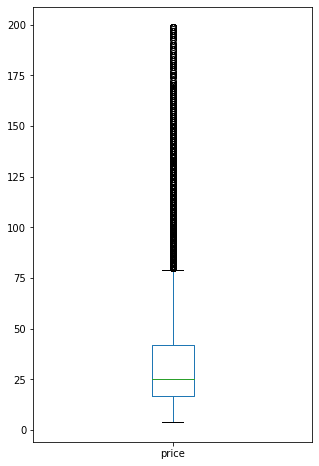

In [27]:
# price 数据分散，选取小于200的数据在进行可视化
print("在winemag-data-130k-v2数据中：")
df_130[df_130["price"] < 200]["price"].plot.box(figsize=(5, 8))
plt.show()

## 二、缺失数据的处理


#### 1.查看数据缺失的数量

In [28]:
print("在winemag-data-130k-v2数据中：")
print(df_130.isnull().sum())

在winemag-data-130k-v2数据中：
Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64


#### 2.使用 “将缺失部分剔除” 方法进行前后数据分析

In [33]:
# 定义新旧标称数据对比可视化函数
def nominal_attributes_bf_af(df_1, df_2, nominal_attributes, figsize=(60, 90), num=20):
    for i, column in enumerate(nominal_attributes):
        plt.subplot(7, 2, i * 2 + 1)
        df_1[column].value_counts()[:num].plot.bar(title=column, figsize=figsize, alpha=0.5)
        plt.subplot(7, 2, i * 2 + 2)
        df_2[column].value_counts()[:num].plot.bar(title=column, figsize=figsize, alpha=0.9)
    plt.show()


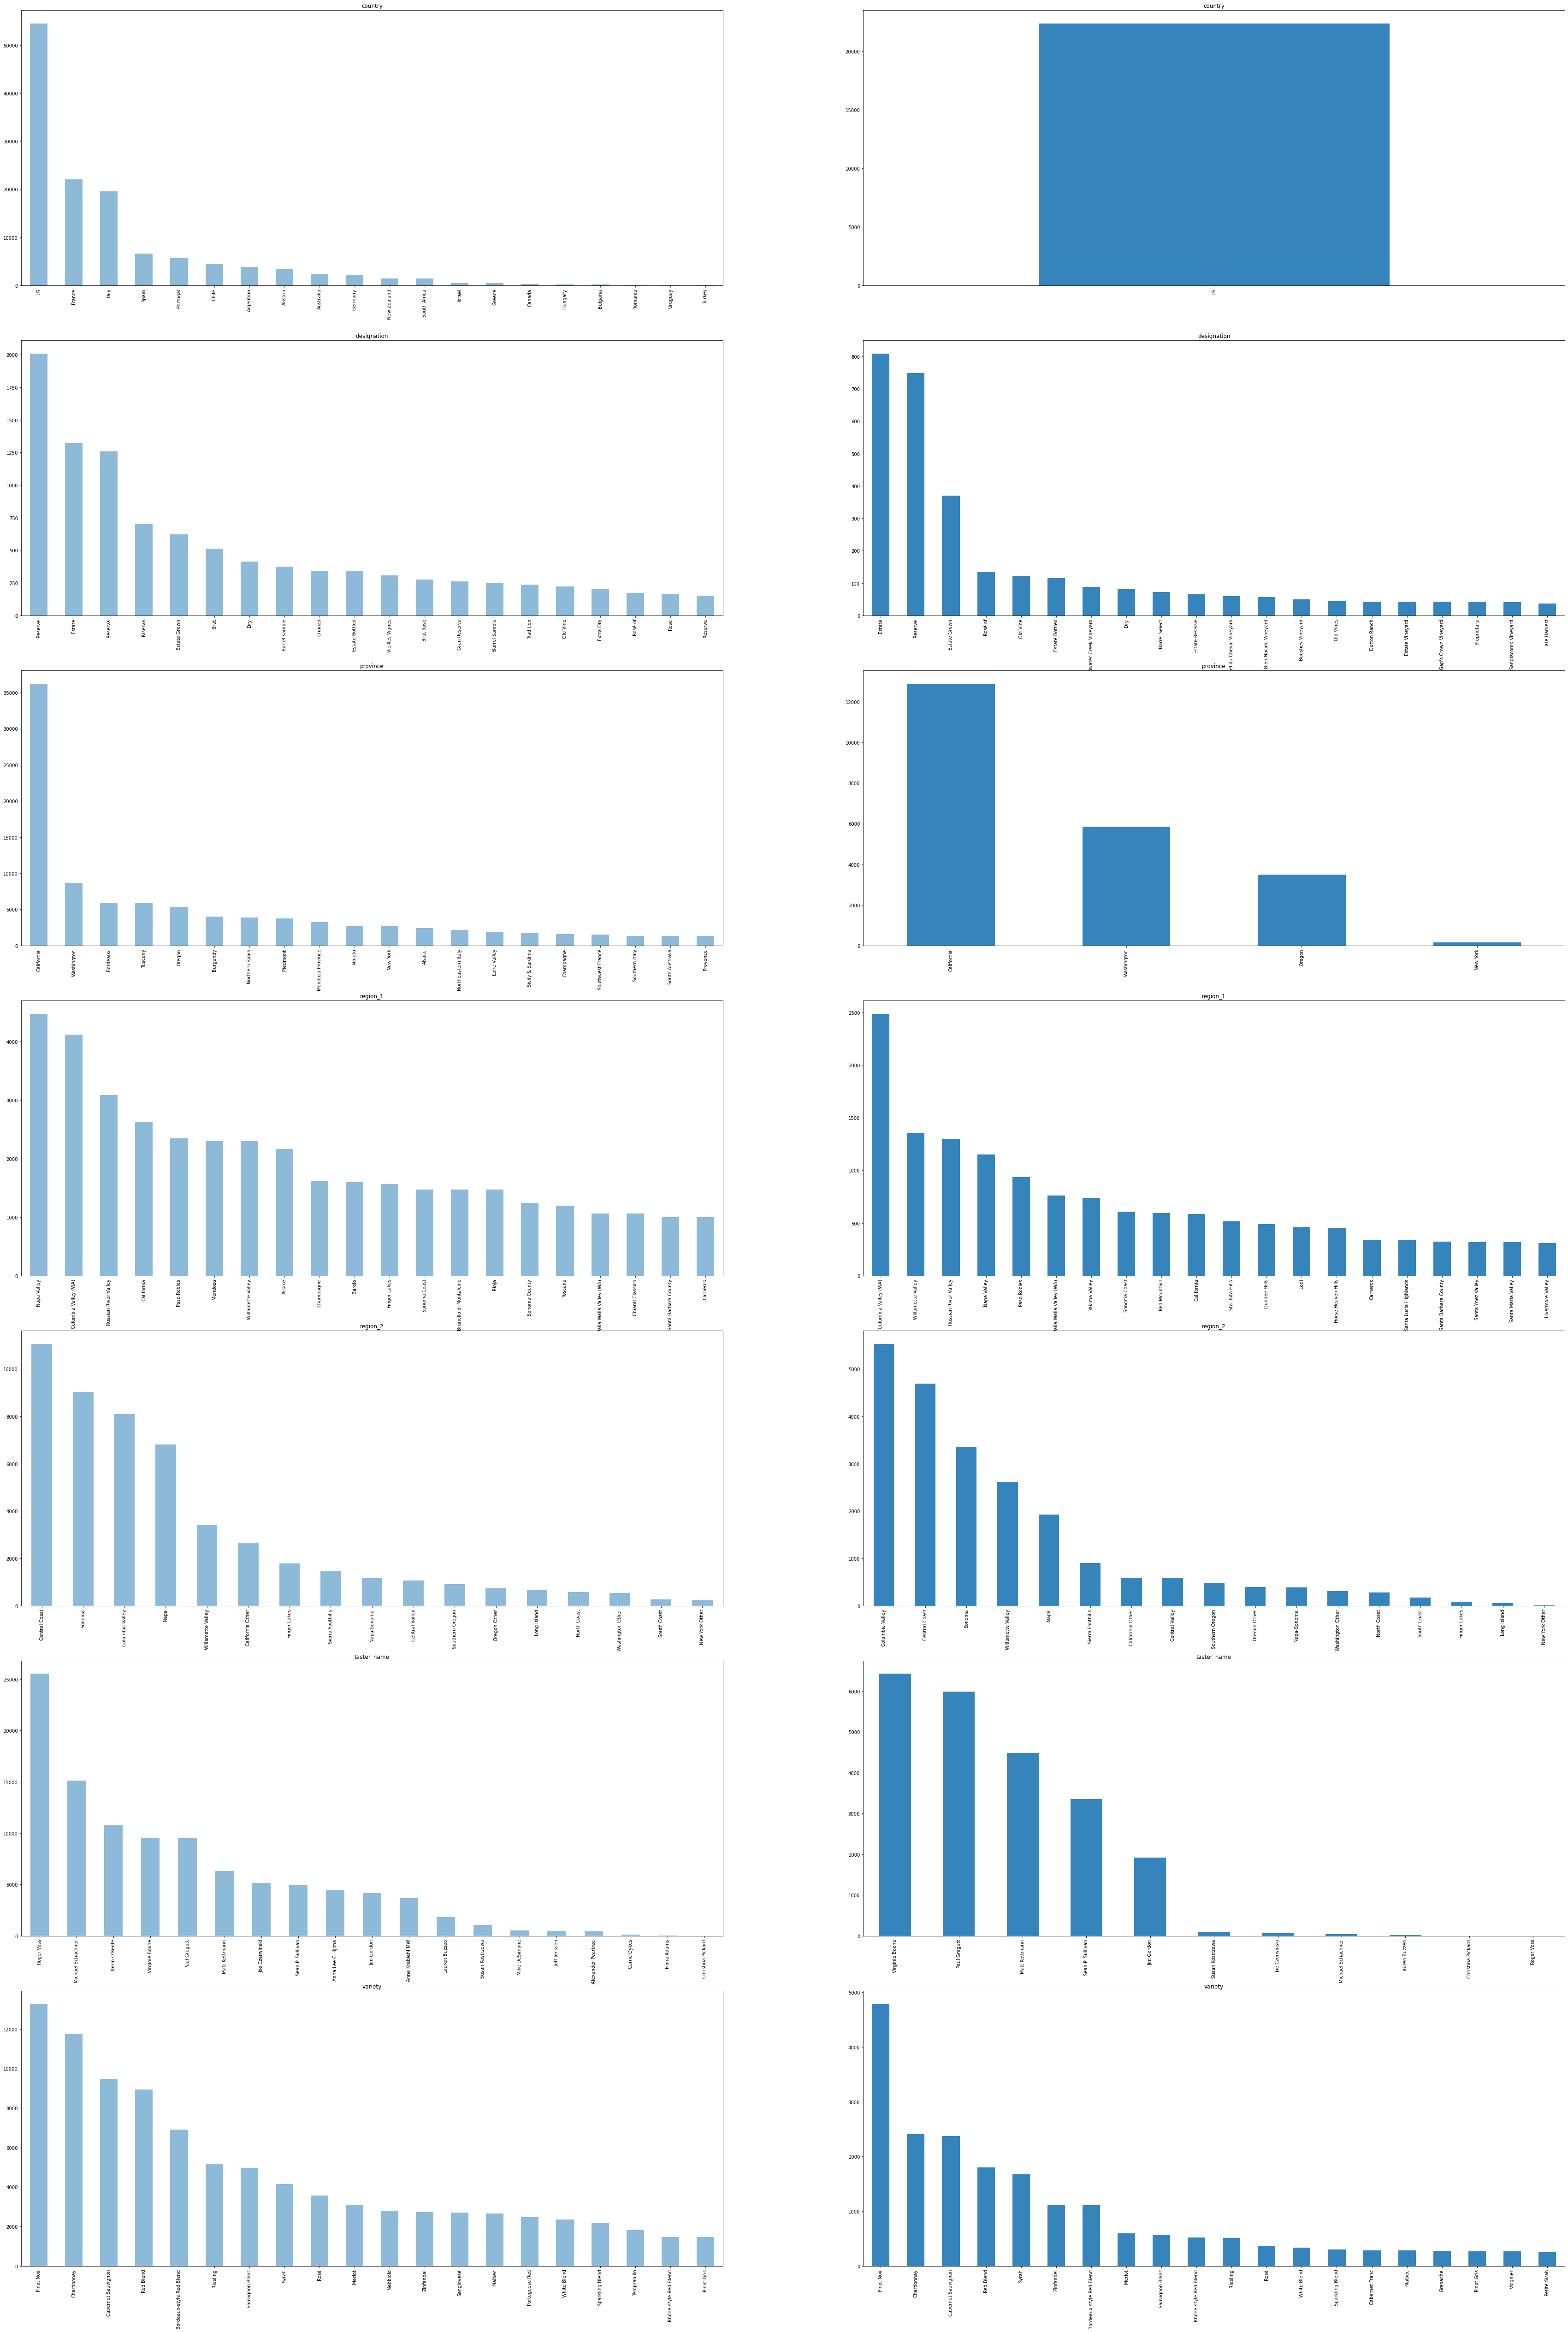

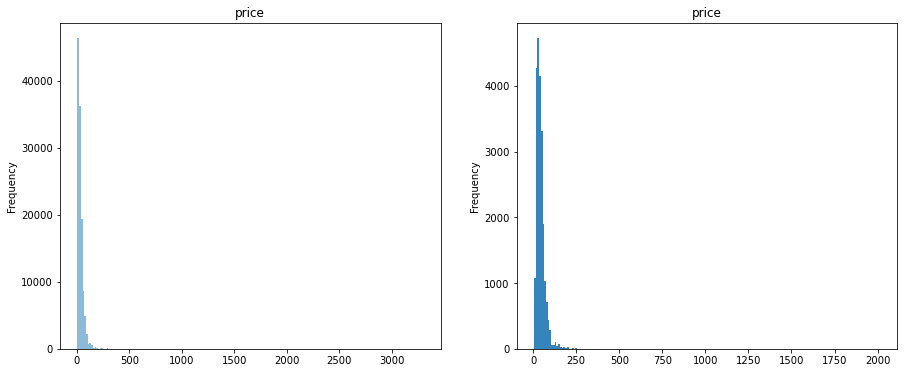

In [34]:
# 在winemag-data-130k-v2数据中
df_130_1 = df_130.dropna(how="any")
# 可视化对比新旧数据
nominal_attributes_bf_af(df_130, df_130_1, ['country', 'designation',  'province', 'region_1', 'region_2', 'taster_name', 'variety'])
plt.subplot(1, 2, 1)
df_130["price"].plot.hist(title="price", figsize=(15, 6), bins=200, alpha=0.5)
plt.subplot(1, 2, 2)
df_130_1["price"].plot.hist(title="price", figsize=(15, 6), bins=200, alpha=0.9)
plt.show()

In [35]:
# winemag-data-130k-v2 数据
print("在winemag-data-130k-v2数据中")
print("缺失值填充前：\n", df_130.describe())
print("缺失值填充后：\n", df_130_1.describe())

在winemag-data-130k-v2数据中
缺失值填充前：
           Unnamed: 0         points          price
count  129971.000000  129971.000000  120975.000000
mean    64985.000000      88.447138      35.363389
std     37519.540256       3.039730      41.022218
min         0.000000      80.000000       4.000000
25%     32492.500000      86.000000      17.000000
50%     64985.000000      88.000000      25.000000
75%     97477.500000      91.000000      42.000000
max    129970.000000     100.000000    3300.000000
缺失值填充后：
           Unnamed: 0        points         price
count   22387.000000  22387.000000  22387.000000
mean    65656.944745     89.537812     41.465404
std     37566.725499      2.809306     29.379374
min         4.000000     80.000000      4.000000
25%     33404.000000     88.000000     25.000000
50%     66312.000000     90.000000     36.000000
75%     98460.500000     92.000000     50.000000
max    129950.000000    100.000000   2013.000000


#### 3. 使用 “用最高频率值来填补缺失值” 方法进行前后数据分析 

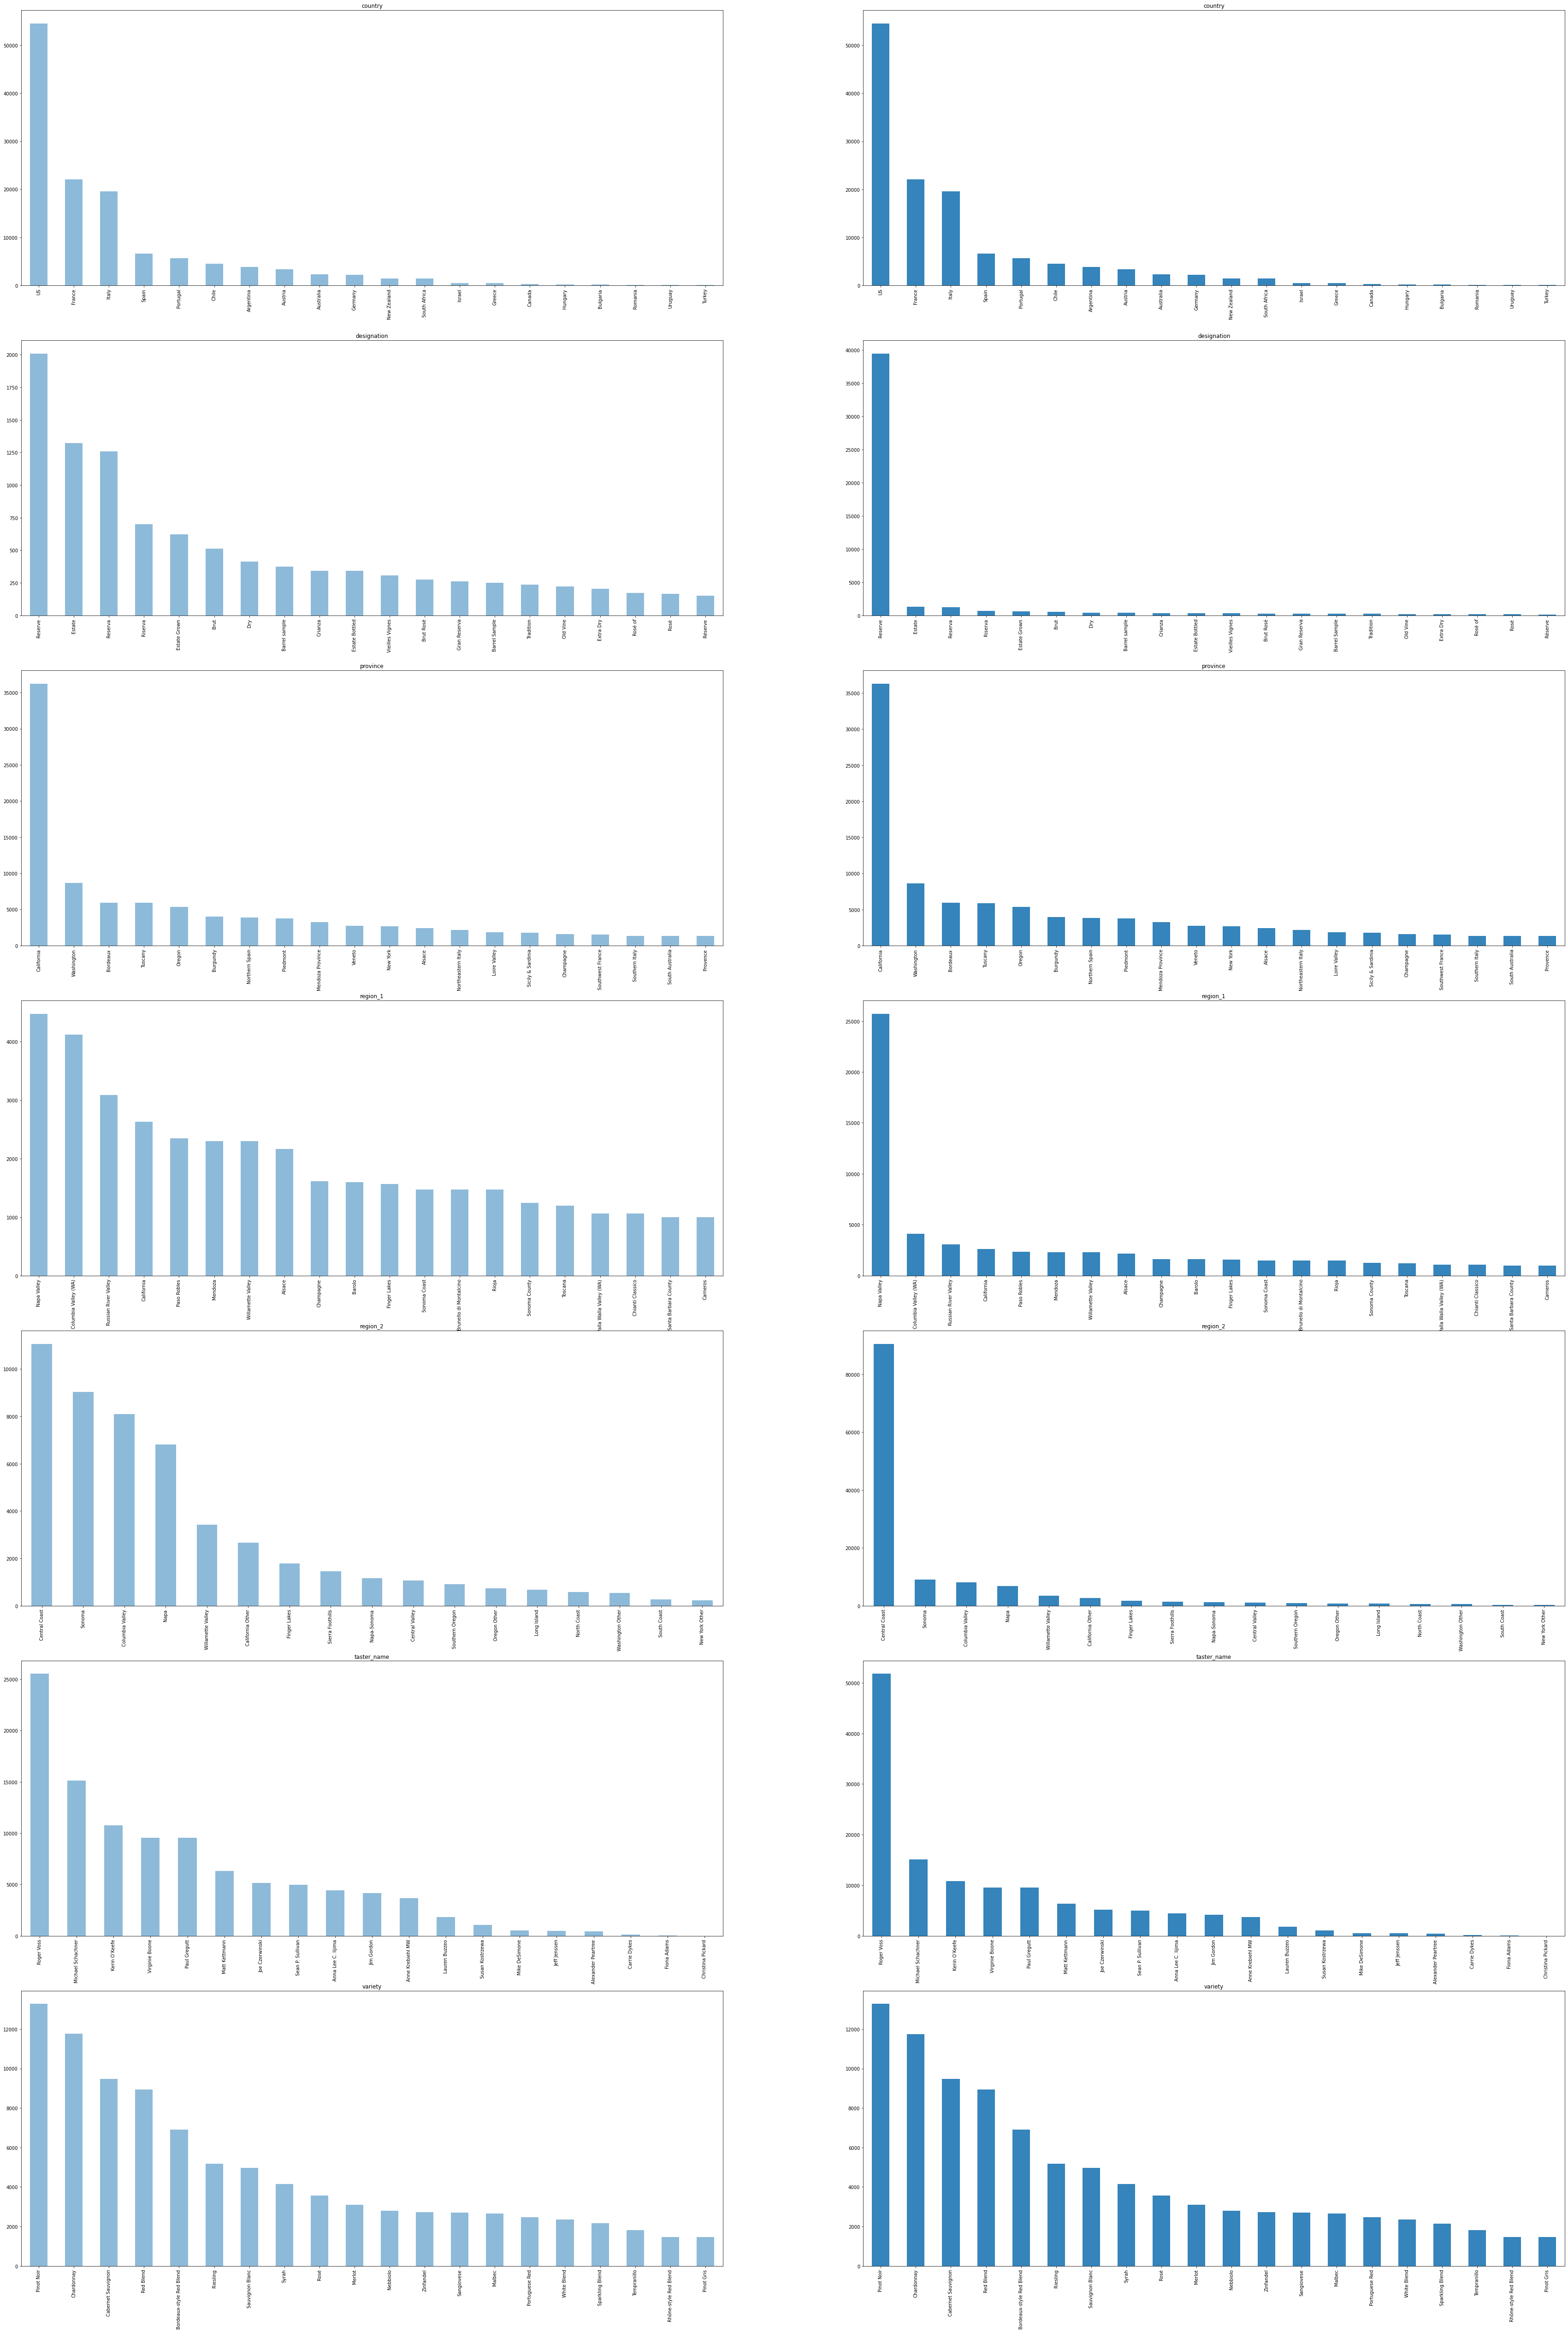

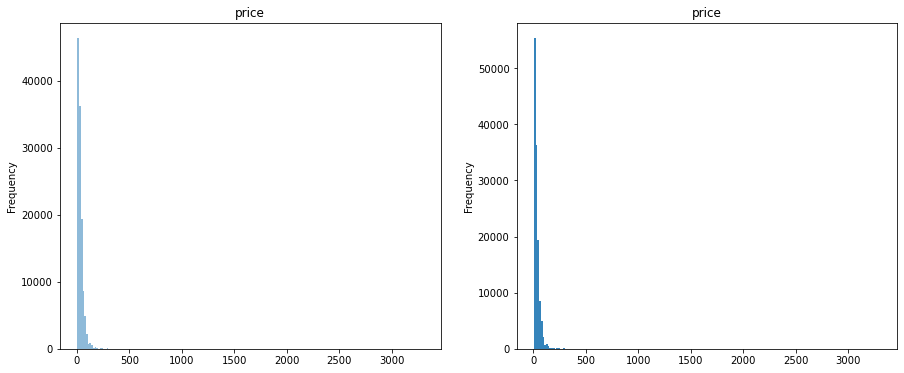

In [51]:
df_130_2 = df_130.fillna(df_130.mode().iloc[0])
# 可视化对比新旧数据
nominal_attributes_bf_af(df_130, df_130_2, ['country', 'designation',  'province', 'region_1', 'region_2', 'taster_name', 'variety'])
plt.subplot(1, 2, 1)
df_130["price"].plot.hist(title="price", figsize=(15, 6), bins=200, alpha=0.5)
plt.subplot(1, 2, 2)
df_130_2["price"].plot.hist(title="price", figsize=(15, 6), bins=200, alpha=0.9)
plt.show()

In [52]:
# winemag-data-130k-v2 数据
print("在winemag-data-130k-v2数据中")
print("缺失值填充前：\n", df_130.describe())
print("缺失值填充后：\n", df_130_2.describe())

在winemag-data-130k-v2数据中
缺失值填充前：
           Unnamed: 0         points          price
count  129971.000000  129971.000000  120975.000000
mean    64985.000000      88.447138      35.363389
std     37519.540256       3.039730      41.022218
min         0.000000      80.000000       4.000000
25%     32492.500000      86.000000      17.000000
50%     64985.000000      88.000000      25.000000
75%     97477.500000      91.000000      42.000000
max    129970.000000     100.000000    3300.000000
缺失值填充后：
           Unnamed: 0         points          price
count  129971.000000  129971.000000  129971.000000
mean    64985.000000      88.447138      34.300005
std     37519.540256       3.039730      39.768715
min         0.000000      80.000000       4.000000
25%     32492.500000      86.000000      18.000000
50%     64985.000000      88.000000      25.000000
75%     97477.500000      91.000000      40.000000
max    129970.000000     100.000000    3300.000000


#### 4. 使用 “通过属性的相关关系来填补缺失值” 方法进行前后数据分析 

In [66]:
import copy
from sklearn.ensemble import RandomForestRegressor
# 判断属性之间的相关性，价格和红酒的得分成正相关，根据相关系数验证
print("在winemag-data-130k-v2数据中：price和points相关系数为：{}".format(df_130['price'].corr(df_130['points'])))

在winemag-data-130k-v2数据中：price和points相关系数为：0.41616674186062247


In [68]:
def fill_nan_with_corr(df, df_3):
    # 把已有的数值型特征取出来输入到RandomForestRegressor中
    process_df = df[['price', 'points']]
    # 已知该特征和未知该特征
    known = process_df[process_df.price.notnull()].values
    unknown = process_df[process_df.price.isnull()].values
    # X为特征属性值
    X = known[:, 1].reshape(-1,1)
    # y为结果标签值
    y = known[:, 0].reshape(-1,1)
    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000,  n_jobs=-1)
    rfr.fit(X,y)
    # 用得到的模型进行未知特征值预测
    predicted = rfr.predict(unknown[:, 1].reshape(-1,1))
    # 用得到的预测结果填补原缺失数据
    df_3.loc[(df_3.price.isnull()), 'price'] = predicted
    return df_3

<ipython-input-68-89f3a8d50414>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X,y)


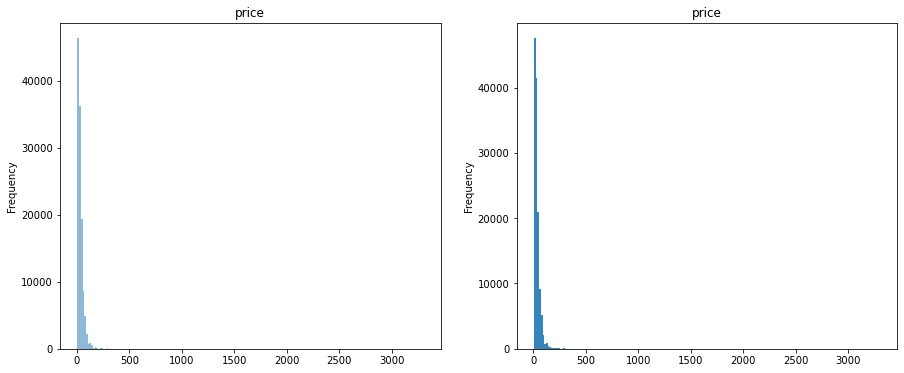

In [69]:
data_130_3 = copy.deepcopy(df_130)
df_130_3 = fill_nan_with_corr(df_130, data_130_3)
# 可视化对比新旧数据
plt.subplot(1, 2, 1)
df_130["price"].plot.hist(title="price", figsize=(15, 6), bins=200, alpha=0.5)
plt.subplot(1, 2, 2)
df_130_3["price"].plot.hist(title="price", figsize=(15, 6), bins=200, alpha=0.9)
plt.show()

In [70]:
# winemag-data-130k-v2 数据
print("在winemag-data-130k-v2数据中")
print("缺失值填充前：\n", df_130.describe())
print("缺失值填充后：\n", df_130_3.describe())

在winemag-data-130k-v2数据中
缺失值填充前：
           Unnamed: 0         points          price
count  129971.000000  129971.000000  120975.000000
mean    64985.000000      88.447138      35.363389
std     37519.540256       3.039730      41.022218
min         0.000000      80.000000       4.000000
25%     32492.500000      86.000000      17.000000
50%     64985.000000      88.000000      25.000000
75%     97477.500000      91.000000      42.000000
max    129970.000000     100.000000    3300.000000
缺失值填充后：
           Unnamed: 0         points          price
count  129971.000000  129971.000000  129971.000000
mean    64985.000000      88.447138      35.491401
std     37519.540256       3.039730      40.023530
min         0.000000      80.000000       4.000000
25%     32492.500000      86.000000      18.000000
50%     64985.000000      88.000000      26.000000
75%     97477.500000      91.000000      42.000000
max    129970.000000     100.000000    3300.000000


#### 5. 使用 “通过数据对象之间的相似性来填补缺失值” 方法进行前后数据分析 

/usr/local/Caskroom/miniconda/base/envs/cv-base/lib/python3.8/site-packages/impyute/imputation/cs/fast_knn.py:113: RuntimeWarning: invalid value encountered in true_divide
  weights = distances/np.sum(distances)


<AxesSubplot:title={'center':'price'}, ylabel='Frequency'>

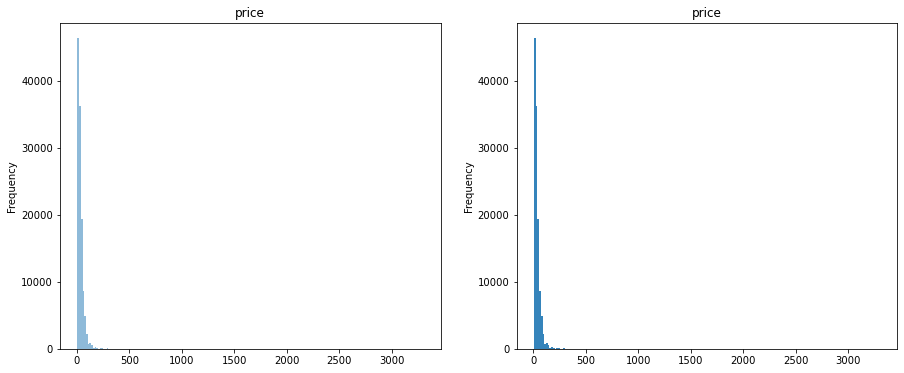

In [74]:
from impyute import fast_knn
features = ['points', 'price']
df_130_4 = pd.DataFrame(fast_knn(np.array(df_130[features]), k=2), columns=features)
# 可视化对比新旧数据
plt.subplot(1, 2, 1)
df_130["price"].plot.hist(title="price", figsize=(15, 6), bins=200, alpha=0.5)
plt.subplot(1, 2, 2)
df_130_4["price"].plot.hist(title="price", figsize=(15, 6), bins=200, alpha=0.9)

In [75]:
# winemag-data-130k-v2 数据
print("在winemag-data-130k-v2数据中")
print("缺失值填充前：\n", df_130.describe())
print("缺失值填充后：\n", df_130_4.describe())

在winemag-data-130k-v2数据中
缺失值填充前：
           Unnamed: 0         points          price
count  129971.000000  129971.000000  120975.000000
mean    64985.000000      88.447138      35.363389
std     37519.540256       3.039730      41.022218
min         0.000000      80.000000       4.000000
25%     32492.500000      86.000000      17.000000
50%     64985.000000      88.000000      25.000000
75%     97477.500000      91.000000      42.000000
max    129970.000000     100.000000    3300.000000
缺失值填充后：
               points          price
count  129971.000000  120984.000000
mean       88.447138      35.363383
std         3.039730      41.020692
min        80.000000       4.000000
25%        86.000000      17.000000
50%        88.000000      25.000000
75%        91.000000      42.000000
max       100.000000    3300.000000
